In [67]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import statsmodels.api as sm
from sklearn import metrics
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv('/Users/bonnie/Documents/MMA8502/GroupAssignment/bank-additional-full.csv',sep = ';')
df.head()
#df.to_csv('data.csv', index = False)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [69]:
corrMatrix = df.corr()
corrMatrix

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


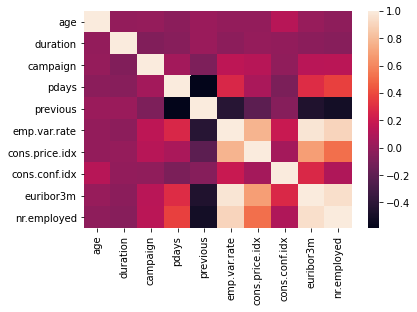

In [70]:
sn.heatmap(corrMatrix)
plt.show()

1b. how to deal with missing categorical values? 
    1. Replace the missing/'Unknown' values by the most frequent values (mode)
    2. KNN
    https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779
    
    https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e
    Dummy Varaible Trap: scenario in which varaibles are highly correlated to each other -> multicollinearity

In [71]:
df = df.replace('unknown', np.nan)

In [72]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [73]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [74]:
#df.dtypes
str_var = df[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome', 'y']]
#str_var
dummies = pd.get_dummies(str_var, drop_first=True)
dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [75]:
#check multicollinearity
vif = pd.DataFrame()
vif["feature"] = dummies.columns
vif["VIF"] = [variance_inflation_factor(dummies.values, i)
                          for i in range(len(dummies.columns))]
  
print(vif) # <= 1: very less multicollinearity

                          feature       VIF
0                 job_blue-collar  0.010694
1                job_entrepreneur  0.138807
2                   job_housemaid  0.038681
3                  job_management  0.048102
4                     job_retired  0.129689
5               job_self-employed  0.112964
6                    job_services  0.048829
7                     job_student  0.140229
8                  job_technician  0.025902
9                  job_unemployed  0.267922
10                marital_married  0.021114
11                 marital_single  0.013264
12             education_basic.6y  0.145812
13             education_basic.9y  0.050901
14          education_high.school  0.012404
15           education_illiterate  1.003558
16  education_professional.course  0.053082
17    education_university.degree  0.039279
18                    default_yes  1.001250
19                    housing_yes  0.006922
20                       loan_yes  0.019652
21              contact_telephon

In [76]:
df = df.drop(['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y'], axis=1)
df = pd.concat([df, dummies], axis = 1)
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,1,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,1,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,1,0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,1,0,1


In [77]:
# nomarlize the data as KNN Imputer is distance-based 
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [78]:
# optimal K usuaully is the square root of N=41188
imputer = KNNImputer(n_neighbors=203)
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [79]:
#df.isna().any()
df.isna().sum() #Complete data cleaning

age                              0
duration                         0
campaign                         0
pdays                            0
previous                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
marital_married                  0
marital_single                   0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university.degree      0
default_yes         

In [91]:
# model for group 1 - 3 variables
y_data = df['y_yes']
x_data = df.drop(['y_yes', 'emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'],axis=1)
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size= 0.3, random_state=0)
model1 = LogisticRegression(solver='lbfgs',max_iter=1000)
LR = model1.fit(x_training_data, y_training_data)
y_pred_data = model1.predict(x_test_data)

In [81]:
#Confusion Matrix - Classfication Table with default threshold 0.5
cnf_matrix1 = metrics.confusion_matrix(y_test_data, y_pred_data)
cnf_matrix1

array([[10734,   235],
       [  929,   459]])

In [104]:
# Default threshold 0.5
print("Accuracy:",metrics.accuracy_score(y_test_data, y_pred_data)) #TP+TN/TP+FP+FN+TN
print("Precision:",metrics.precision_score(y_test_data, y_pred_data)) #TN/TN+FN
print("Recall:",metrics.recall_score(y_test_data, y_pred_data)) # TP/TP+FN
print(classification_report(y_test_data, y_pred_data))

Accuracy: 0.8879987051873433
Precision: 0.6
Recall: 0.008645533141210375
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     10969
         1.0       0.60      0.01      0.02      1388

    accuracy                           0.89     12357
   macro avg       0.74      0.50      0.48     12357
weighted avg       0.86      0.89      0.84     12357



In [102]:
# Find the optimal threshold to produce max accuracy
threshold = 0.01
max_accuracy = 0 
optimal_threshold = 0.01
while threshold < 1:
    y_pred_data = (LR.predict_proba(x_test_data)[:, 1] > threshold).astype('float')
    metrics1 = metrics.confusion_matrix(y_test_data, y_pred_data)
    accuracy = metrics.accuracy_score(y_test_data, y_pred_data)
    if accuracy > max_accuracy: 
        max_accuracy = accuracy
        optimal_threshold = threshold
    threshold += 0.01
print(optimal_threshold)
print(max_accuracy)

0.35000000000000014
0.9083110787407946


In [56]:
threshold = 0.3
y_pred_data = (LR.predict_proba(x_test_data)[:, 1] > threshold).astype('float')
metrics1 = metrics.confusion_matrix(y_test_data, y_pred_data)
print(metrics1)
print("Accuracy:",metrics.accuracy_score(y_test_data, y_pred_data)) 

[[10449   520]
 [  640   748]]
Accuracy: 0.9061260823824553


In [57]:
threshold = 0.5
y_pred_data = (LR.predict_proba(x_test_data)[:, 1] > threshold).astype('float')
metrics1 = metrics.confusion_matrix(y_test_data, y_pred_data)
print(metrics1)
print("Accuracy:",metrics.accuracy_score(y_test_data, y_pred_data)) 

[[10734   235]
 [  929   459]]
Accuracy: 0.9058023792182569


In [58]:
threshold = 0.7
y_pred_data = (LR.predict_proba(x_test_data)[:, 1] > threshold).astype('float')
metrics1 = metrics.confusion_matrix(y_test_data, y_pred_data)
print(metrics1)
print("Accuracy:",metrics.accuracy_score(y_test_data, y_pred_data))

[[10864   105]
 [ 1136   252]]
Accuracy: 0.8995710933074371


In [24]:
logit_m = sm.Logit(y_data,x_data).fit()
print(logit_m.summary())

         Current function value: 0.230278
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  y_yes   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41146
Method:                           MLE   Df Model:                           41
Date:                Fri, 10 Sep 2021   Pseudo R-squ.:                  0.3459
Time:                        04:44:49   Log-Likelihood:                -9484.7
converged:                      False   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                               0.0213      0.183      0.116      0.908      -0.338       0.380
duration

/Users/bonnie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


For each level under each categorical variables, the p-value means whether the level is different from the reference level (the level I dropped earilier in one-hot encoding). If p<0.05, it means that there is a difference between this level and our reference level, which also means that this whole variable should be significant to the response. However, to make it more accurate, we should also run a likelihood test or ANOVA to confirm whether the variable(regardless of its levels) is significant. The coef for each level of each categorical variable means the difference between this level and the reference level. (we don't need to worry about the interpretation of the coef for now.)

For continuous variable, coef means 1 unit increase in x will result in the 'coef' times increase in the log odds of y. 

The intercept does not matter here and we don't need to do anything about it. 

In [ ]:
#likelihood ratio test or ANOVA

from scipy.stats.distributions import chi2
def likelihood_ratio(llmin, llmax):
    return(2*(llmax-llmin))

LLR = likelihood_ratio(L1,L2)

p = chi2.sf(LR, 1) # L2 has 1 DoF more than L1

print 'p: %.30f' % p 

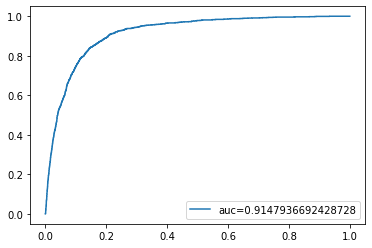

In [92]:
y_pred_proba = model1.predict_proba(x_test_data)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_data, y_pred_proba)
auc_ = metrics.roc_auc_score(y_test_data, y_pred_proba)
plt.plot(fpr, tpr, label="auc="+str(auc_))
plt.legend(loc=4)
plt.show()

In [107]:
#model for all groups
y = df['y_yes']
x = df.drop('y_yes', axis = 1)
x_training, x_test, y_training, y_test = train_test_split(x, y, test_size= 0.3, random_state=0)
model = LogisticRegression(solver='lbfgs',max_iter=1000)
fit = model.fit(x_training, y_training)
y_pred=model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     10969
         1.0       0.67      0.40      0.50      1388

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.72     12357
weighted avg       0.90      0.91      0.90     12357



In [115]:
# Find the optimal threshold to produce max accuracy
threshold = 0.01
max_accuracy = 0 
optimal_threshold = 0.01
while threshold < 1:
    y_pred = (fit.predict_proba(x_test)[:, 1] > threshold).astype('float')
    metrics1 = metrics.confusion_matrix(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    if accuracy > max_accuracy: 
        max_accuracy = accuracy
        optimal_threshold = threshold
    threshold += 0.01
print(optimal_threshold)
print(max_accuracy)

0.36000000000000015
0.9118718135469774


In [109]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[10695   274]
 [  837   551]]


In [110]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.910091446143886
Precision: 0.6678787878787878
Recall: 0.3969740634005764


In [114]:
threshold = 0.3
y_pred = (fit.predict_proba(x_test)[:, 1] > threshold).astype('float')
metrics1 = metrics.confusion_matrix(y_test, y_pred)
print(metrics1)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

[[10393   576]
 [  525   863]]
Accuracy: 0.9109007040543822


In [96]:
logit_model = sm.Logit(y,x).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.207902
         Iterations 20
                           Logit Regression Results                           
Dep. Variable:                  y_yes   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41141
Method:                           MLE   Df Model:                           46
Date:                Sat, 11 Sep 2021   Pseudo R-squ.:                  0.4094
Time:                        00:23:25   Log-Likelihood:                -8563.1
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                              -0.1955      0.194     -1.007      0

Notice that Pseudo R-squre is 0.4 which indicates a very good model fit (rule of thumb: ranging from 0.2 to 0.4)

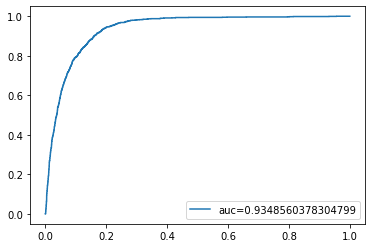

In [97]:
# AOC Curve: how much the model is capbable of distingushing the classes
y_pred_prob = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

You can compare AUC, Pseduo R squared and Accuracy for the two models. 

report - introduction, conclusion, recommendations, tables 

12-min presentation 
10 min analysis and conclusions 
2 min questions 

group C - socio-economic analysis control variale -> might affect the response 